In [11]:
import sys
sys.path.append("/home/irtimid/Documents/travail/programmes/le2m-v2.1/extractor/")
import extractor
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
datafile = sqlite3.connect("data.sqlite")
parts = extractor.get_splittedparts(extractor.get_parts(datafile))
parts

[u'partie_questionnaireFinal', u'partie_GneezyPotter_repetitions']

In [21]:
data = extractor.get_partdata(datafile, 'partie_GneezyPotter_repetitions')
data.head()

session            joueur  id  partie_partie_id  GP_period  \
0  201509211436  201509211436_j_6   5                41          0   
1  201509211436  201509211436_j_2   9                42          0   
2  201509211436  201509211436_j_4   3                43          0   
3  201509211436  201509211436_j_8   1                44          0   
4  201509211436  201509211436_j_9   2                45          0   

   GP_treatment  GP_dotation  GP_decision  GP_decisiontime  GP_randomdraw  \
0             0           10            5                0              0   
1             0           10            5                0              1   
2             0           10            6                0              1   
3             0           10            6                0              0   
4             0           10            4                0              0   

   GP_periodpayoff  GP_cumulativepayoff  
0               20                   20  
1                5                    5  
2                4                    4  
3               22                   22  
4               18                   18  

[5 rows x 12 columns]

In [22]:
invest = data.groupby([data.session, data.joueur]).mean()["GP_decision"]
invest

session       joueur           
201509211436  201509211436_j_0      8
              201509211436_j_1     10
              201509211436_j_10     8
              201509211436_j_11     3
              201509211436_j_12     5
              201509211436_j_13     6
              201509211436_j_14     4
              201509211436_j_15     8
              201509211436_j_16     4
              201509211436_j_17     5
              201509211436_j_18    10
              201509211436_j_19     7
              201509211436_j_2      5
              201509211436_j_3      2
              201509211436_j_4      6
...
201509211503  201509211503_j_13     6
              201509211503_j_14     4
              201509211503_j_15     7
              201509211503_j_16     9
              201509211503_j_17     0
              201509211503_j_18     3
              201509211503_j_19     2
              201509211503_j_2      1
              201509211503_j_3      3
              201509211503_j_4      9
              

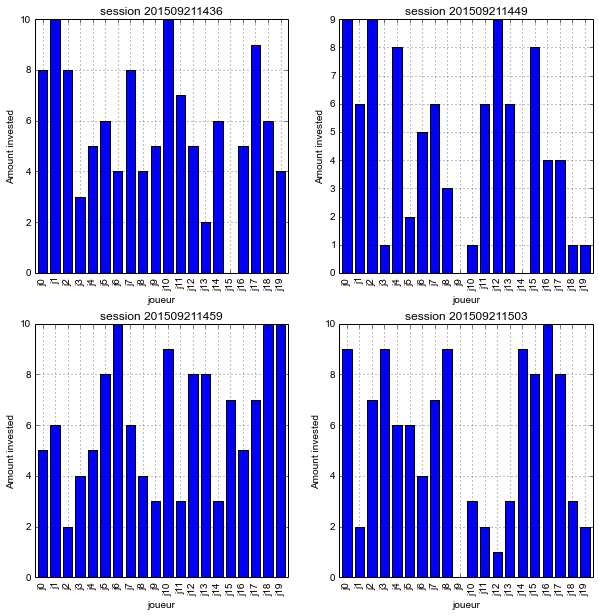

In [41]:
sessions, joueurs = invest.index.levels
nbrows = len(sessions)/2 if len(sessions)%2 == 0 else (len(sessions)/2) + 1
fig = plt.figure(figsize=(10, 10))
for c, s in enumerate(sessions):
    graph = fig.add_subplot(nbrows, 2, c+1)
    inv = invest.ix[s]
    inv.plot(kind="bar", ax=graph)
    graph.set_xticklabels(["j{}".format(i) for i, _ in enumerate(joueurs)])
    graph.set_ylabel("Amount invested")
    graph.set_title("session {}".format(s))